**Kelompok 10**

Anggota Kelompok:
1. Halomoan Filipus Simarmata (Jupyter XXI)
2. Diana Eka Riyani (Jupyter XXI)
3. Nyayu Chika Marselina (Jupyter XXI)
4. Sukma Imelda (Cordoba)
5. Athiya Shinta Wulandari (Cordoba)

#AI Project Cycle - Analisis Sentimen (Natural Language Processing)

##Problem Solving

1. What? (Apa masalahnya? Apa yg dibutuhkan?) : Pelanggan toko mainan memberi ulasan dan penilaian verified atau not verified pada produk mainan.
2. Where? (Dimana / pada saat apa permasalahan ini muncul?) : Saat pelanggan di seluruh dunia memberi ulasan dan penilaian dari toko mainan di Eropa.
3. Who? (Stakeholder yang terkait) : Pelanggan dan Toko Mainan.
4. Why? (Kenapa masalah ini muncul? Bagaimana solusinya?) : Adanya ulasan dan penilaian dari pelanggan di seluruh dunia pada produk mainan sehingga dapat digunakan untuk mendeteksi sentimen verified atau not verified dalam teks.

##Data Acquisition

Data diperoleh dari Kaggle:
https://www.kaggle.com/datasets/mafaisal007/product-reviews-and-ratings-sentiment-analysis

##Data Exploration

Kumpulan data ini berasal dari toko mainan di Eropa yang berisi ulasan dan penilaian pelanggan yang verified atau not verified di Eropa pada produk mainan yang disimpan di dalam file dengan format csv.


##Modelling

Program dalam mini project ini menggunakan modelling dengan menggunakan Naive Bayes, Random Forest, dan SVM untuk prediksi input suatu review dan mengukur tingkat akurasinya.

##Evaluation

Dari pengolahan data yang kami lakukan seperti:
1. Input Data Training
2. Preprocessing
3. Modelling
4. Evaluation
5. Prediction

Kami memperoleh akurasi, recall, dan presisi dari masing-masing model klasifikasi yang kami gunakan. Dengan menggunakan Random Forest, diperoleh akurasi sebesar 96,09%, recall sebesar 100%, dan presisi sebesar 96,07%. Dengan Naive Bayes, diperoleh akurasi sebesar 67,43%, recall sebesar 70,31%, dan presisi sebesar 94,06%. Sedangkan, pada meodel klasifikasi SVM, diperoleh akurasi senilai 97,07%, recall sebesar 100%, serta presisi senilai 97,02%. Dari ketida model klasifikasi yang digunakan, dapat disimpulkan bahwa model klasifikasi SVM menghasilkan akurasi tertinggi di antara model klasifikasi lainnya. 

#Implementasi - Analisis Sentimen dengan TF-IDF

## Melakukan Import Library

In [ ]:
import numpy as np 
import pandas as pd 
import re  
import nltk 
nltk.download('stopwords')  
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Dataset

Kita menggunakan metode read_csv dari library Pandas untuk memuat dataset ke dalam kerangka data. Dapat juga menggunakan URL online atau mengunduh file dan menggunakan jalur lokal file CSV di mesin.

Langkah selanjutnya, muat dataset yang akan digunakan untuk melatih model. Seperti yang dibicarakan sebelumnya, kita akan membangun model analisis sentimen untuk memprediksi sentimen publik tentang ulasan dan penilaian dari pelanggan di Eropa pada produk mainan. Dataset tersedia di Kaggle. Sentimen yang digunakan yaitu hanya verified dan not verified.

Gunakan metode read_csv dari library Pandas untuk memuat dataset ke dalam dataframe “datasetkelompok10.csv”. Kita dapat menggunakan URL online atau mengunduh file dan menggunakan lokal path file CSV di drive.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datasetkelompok10.csv to datasetkelompok10 (1).csv


In [ ]:
data = pd.read_csv("datasetkelompok10.csv")
t_1 = data[data['Type']=='Verified']
t_2 = data[data['Type']=='Not Verified']
reviews = pd.concat([t_1, t_2])

(*) DataFrame adalah struktur data dua dimensi, sehingga data diselaraskan dalam bentuk seperti tabel, yaitu dalam baris dan kolom. Ini umumnya merupakan objek dari Pandas yang paling umum digunakan.

Untuk melihat bagaimana dataset terlihat, gunakan metode head() dari dataframe Pandas, yang akan menampilkan 5 baris pertama atau metode tail() untuk menampilkan 5 baris terbawah dari dataset seperti yang ditunjukkan di bawah ini:

In [ ]:
# Cek 5 Dataset teratas
reviews.head()

,id,Rating,Lang,Type,Country,Date,Helpful,translated
0,72,5,it,Verified,Italy,11/1/2020,43.0,What to say? My daughter LOVES him and I with ...
2,107,5,it,Verified,Italy,8/12/2019,2.0,"An unusual pet, this otter is beautiful! Cute ..."
3,109,4,it,Verified,Italy,4/2/2021,1.0,"Beautiful, soft and very relaxing. It comes wi..."
4,113,4,it,Verified,Italy,21/02/2020,2.0,"Plush tender, my 16-month-old loves it, sleeps..."
5,115,5,it,Verified,Italy,12/11/2019,3.0,"I love it, simply. I bought it after seeing it..."


In [ ]:
# Cek 5 Dataset terbawah
reviews.tail()

,id,Rating,Lang,Type,Country,Date,Helpful,translated
1212,1369,5,de,Not Verified,Germany,25/08/2019,NaN,Our little one was already able to calm down a...
1213,1372,5,de,Not Verified,Germany,23/09/2019,NaN,Babies and small children need closeness and s...
1214,1375,5,de,Not Verified,Germany,9/9/2019,1.0,So the workmanship is really very good. Also t...
1215,1376,5,de,Not Verified,Germany,19/08/2019,1.0,A very magical music box is that. Win a cutene...
1216,1378,5,de,Not Verified,Germany,15/01/2020,NaN,The otter looks high-quality. Very valuable wo...


Begitu pula untuk menampilkan atau menemukan jumlah baris dan kolom dalam dataset dapat menggunakan atribut columns dan shape seperti yang ditunjukkan di bawah ini:

In [ ]:
# Cek attribut dataset
display(reviews.columns)

# Cek jumlah baris dan kolom dataset
display(reviews.shape)

Index(['id', 'Rating', 'Lang', 'Type', 'Country', 'Date', 'Helpful',
       'translated'],
      dtype='object')

(1535, 8)

Dalam output, Kita melihat ada (1535, 8) yang berarti bahwa dataset kami terdiri dari 1535 baris dan 8 kolom. Namun, di antara kolom, kita hanya tertarik pada kolom “type” yang terdiri dari kategori sentimen sebenarnya, dan kolom “translated” yang berisi teks aktual dari ulasan dan penilaian tersebut.

## Explorasi Data

Jadi, sebelum kita membangun model yang sebenarnya. Mari kita lakukan beberapa eksplorasi analisis data pada model. Untuk melihat jumlah ulasan dan penilaian yang verified dan not verified dalam bentuk plot bar, dengan menjalankan skrip di bawah di mana library python dari Seaborn digunakan untuk menggambar metode countplot.

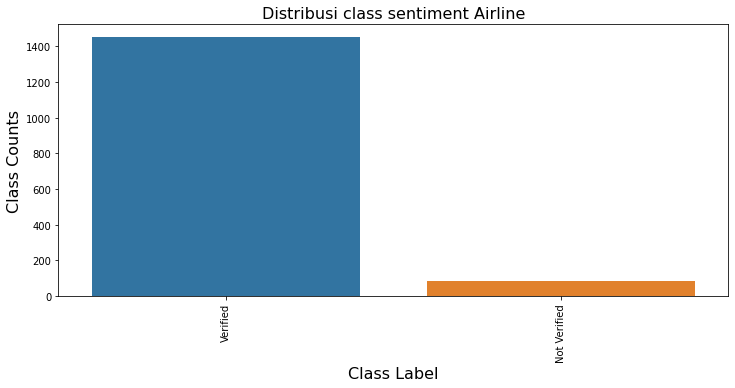

In [ ]:
# Cek jumlah review verified dan not verified
plt.figure(figsize=(12,5))
sns.countplot(x='Type', data=reviews)
plt.title('Distribusi class sentiment Airline', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

Dari output, kita dapat melihat bahwa jumlah ulasan dan penilaian verified jauh lebih tinggi dari pada jumlah ulasan dan penilaian not verified. 

Demikian pula untuk melihat country mana yang mendapat ulasan dan penilaian tertinggi dengan menjalankan skrip berikut.

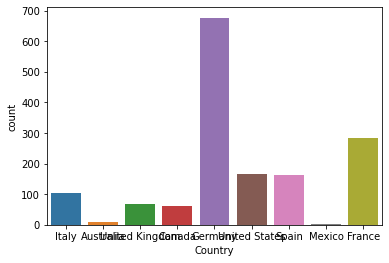

In [ ]:
# Cek Airline yang mendapat review paling tinggi
sns.countplot(x='Country', data=reviews);

Dari output, Kita dapat melihat bahwa country “Germany” mendapat jumlah ulasan dan penilaian tertinggi sedangkan “Australia” mendapat jumlah ulasan dan penilaian terendah.

Akhirnya, mari kita lihat jumlah reviews dan ratings dari toko mainan setiap country di Eropa. Untuk melakukannya, kita dapat kembali menggunakan metode countplot dari library seaborn.

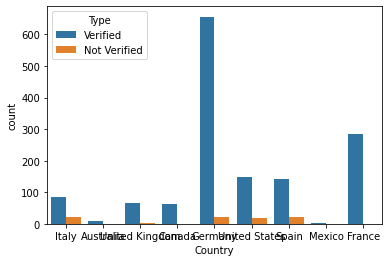

In [ ]:
# Cek jumlah review dari masing-masing Type yang diterima
sns.countplot(x='Country', hue="Type", data=reviews);

Kita dapat melihat bahwa untuk hampir semua country, jumlah ulasan dan penilaian verified lebih besar daripada ulasan dan penilaian not verified.

## Pemrosesan Data

Pertama, mari kita membagi dataset menjadi feature dan label set. Di feature set, Kita hanya akan menggunakan text reviews sebagai feature. Label yang sesuai akan menjadi sentimen dari review tersebut. Kolom text adalah kolom ke 7 (indeks kolom dimulai dari 0 di panda) dalam dataset dan berisi teks dari review tersebut. Demikian pula "type" adalah kolom ketiga yang berisi sentimen. Gunakan metode "iloc" dari dataframe panda untuk membuat feature set X dan label set y, seperti yang ditunjukkan di bawah ini.

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = reviews.iloc[:, 7].values  
le = LabelEncoder()
le.fit(["Verified", "Not Verified"])

print(list(le.classes_))
y = le.transform(reviews.iloc[:, 3].values)

#y = reviews.iloc[:, 3].values
print(X.shape)
print(X[0])
print(y.shape)
print(y[0])

['Not Verified', 'Verified']
(1535,)
What to say? My daughter LOVES him and I with her. Very soft, zero visible seams, tender and especially functional. It reproduces according to the choice of music, white noise, the sound of the Breath or heartbeat. Also the otter tummy lights up and moves as if breathing. For the newborn is a real comfort in the cradle, always kept in safety, I place it away from his face so that he can perceive it even just by touching it with his hand. Wonderful purchase, we are really happy!
(1535,)
1


Dataset tersebut berisi banyak karakter khusus dan ruang kosong. Kita harus menghapusnya agar memiliki dataset yang bersih. Berikut script untuk melakukan itu:

In [ ]:
# Membuat empty List
processed_reviews = []

for reviews in range(0, len(X)):  
    # Hapus semua special characters
    processed_review = re.sub(r'\W', ' ', str(X[reviews]))

    # Hapus semua single characters
    processed_review = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_review)

    # Hapus single characters dari awal
    processed_review = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_review) 

    # Substitusi multiple spaces dengan single space
    processed_review = re.sub(r'\s+', ' ', processed_review, flags=re.I)

    # Hapus prefixed 'b'
    processed_review = re.sub(r'^b\s+', '', processed_review)

    # Ubah menjadi Lowercase
    processed_review = processed_review.lower()

    # Masukkan ke list kosong yang telah dibuat sebelumnya
    processed_reviews.append(processed_review)

In [ ]:
# Cek sebelum cleaning data
print(str(X[:5]))
print()

# Cek setelah cleaning data
processed_reviews[:5]

['What to say? My daughter LOVES him and I with her. Very soft, zero visible seams, tender and especially functional. It reproduces according to the choice of music, white noise, the sound of the Breath or heartbeat. Also the otter tummy lights up and moves as if breathing. For the newborn is a real comfort in the cradle, always kept in safety, I place it away from his face so that he can perceive it even just by touching it with his hand. Wonderful purchase, we are really happy!'
 'An unusual pet, this otter is beautiful! Cute melodies, light in the tummy and fantastic "breath" mode.. I bought it to put it near my 2 month old baby when sleeps because he likes contact very much, it didn\'t work but we love it when wake up!!:) only flaws the price a little \'high even if much lower than the store'
 "Beautiful, soft and very relaxing. It comes with behind (back) the keys you can select (-/+ for the volume, the notes for the type of music to select, the type of noise you want to put (hear

['what to say my daughter loves him and with her very soft zero visible seams tender and especially functional it reproduces according to the choice of music white noise the sound of the breath or heartbeat also the otter tummy lights up and moves as if breathing for the newborn is real comfort in the cradle always kept in safety place it away from his face so that he can perceive it even just by touching it with his hand wonderful purchase we are really happy ',
 'an unusual pet this otter is beautiful cute melodies light in the tummy and fantastic breath mode bought it to put it near my 2 month old baby when sleeps because he likes contact very much it didn work but we love it when wake up only flaws the price little high even if much lower than the store',
 'beautiful soft and very relaxing it comes with behind back the keys you can select for the volume the notes for the type of music to select the type of noise you want to put heart beat white noise etc the belly moving or not the

### TF-IDF

Feature engineering: mengubah kata jadi angka.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'),ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(processed_reviews).toarray()

**Atribut `max_features` menentukan jumlah kata yang paling banyak muncul di mana Anda ingin membuat feature vektor**. Kata-kata yang jarang muncul tidak memainkan peran utama dalam klasifikasi. Karenanya kami hanya menyimpan 2000 kata yang paling sering muncul dalam dataset. **Nilai `min_df` dari 5 menentukan bahwa kata tersebut harus muncul di setidaknya 5 dokumen**. Demikian pula, nilai **`max_df` sebesar 0,7 menetapkan bahwa kata tersebut tidak boleh muncul di lebih dari 70 persen dokumen. Alasan di balik memilih 70 persen sebagai ambang batas adalah bahwa kata-kata yang muncul di lebih dari 70 persen dokumen terlalu umum dan kecil kemungkinannya untuk berperan dalam klasifikasi sentimen.**

Terakhir, untuk mengonversi dataset menjadi feature vektor TF-IDF yang sesuai, Kita perlu memanggil metode `fit_transform` pada kelas `TfidfVectorizer` dan meneruskannya dengan dataset yang telah kami proses sebelumnya.

## Membagi Data ke Training dan Test Set

Sebelum membangun model analisis sentimen yang sebenarnya, bagi dataset ke training dan test set. Model akan melatih pada training set dan dievaluasi pada test set. Berikut script untuk membagi data menjadi training dan test set:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0) #20% data testing

## Pelatihan dan Evaluasi dari Model Klasifikasi Teks

Kita telah membagi data ke dalam training dan test set, langkah selanjutnya adalah melatih model pada training set dan mengevaluasi kinerjanya pada test set. Sekarang, gunakan `RandomForestClassifier, Naive Bayes dan SVM` dari modul `sklearn` untuk melatih model. Kita dapat menggunakan classifier lainnya sesuai pilihan. Untuk melatih model, Kita perlu memanggil metode "fit" pada objek classifier dan meneruskannya ke training feature set dan training label set seperti yang ditunjukkan di bawah ini:

In [ ]:
import time

from sklearn.ensemble import RandomForestClassifier

text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [ ]:
from sklearn.naive_bayes import GaussianNB
text_classifier_nb = GaussianNB()  
t0_nb = time.time()
text_classifier_nb.fit(X_train, y_train)
t1_nb = time.time()

In [ ]:
from sklearn.svm import SVC
text_classifier_svm = SVC(kernel='linear')
t0_svm = time.time()
text_classifier_svm.fit(X_train, y_train)
t1_svm = time.time()

Untuk membuat prediksi pada test set, Kita harus melewati test set ke metode "predict" seperti yang ditunjukkan di bawah ini:

In [ ]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

predictions_nb = text_classifier_nb.predict(X_test)
t2_nb = time.time()
time_linear_train_nb = t1_nb-t0_nb
time_linear_predict_nb = t2_nb-t1_nb

predictions_svm = text_classifier_svm.predict(X_test)
t2_svm = time.time()
time_linear_train_svm = t1_svm-t0_svm
time_linear_predict_svm = t2_svm-t1_svm

# results
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))
print("NB Training time: %fs; Prediction time: %fs" % (time_linear_train_nb, time_linear_predict_nb))
print("SVM Training time: %fs; Prediction time: %fs" % (time_linear_train_svm, time_linear_predict_svm))

EN Training time: 0.591864s; Prediction time: 0.391807s
NB Training time: 0.025266s; Prediction time: 0.357373s
SVM Training time: 0.298535s; Prediction time: 0.095824s


## Results

Terakhir, untuk mengevaluasi model klasifikasi yang digunakan, Kita dapat menggunakan *classification_report, confusion_matrix, accuracy_score, recall_score, precision_score,* dan *f1_score, roc_auc_score* sebagai performance metrics. Metrics ini dapat dihitung menggunakan class dari modul `sklearn.metrics` seperti yang ditunjukkan di bawah ini:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")
print("Naive Bayes")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_nb)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_nb)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_nb)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_nb)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_nb))
print("")
print("Support Vector Machine")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_svm)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_svm)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_svm)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_svm)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_svm))
print("")

print("Random Forest")
print(confusion_matrix(y_test,predictions_en))  
print("")
print("Naive Bayes")
print(confusion_matrix(y_test,predictions_nb))  
print("")
print("Support Vector Machine")
print(confusion_matrix(y_test,predictions_svm))  
print("")

print("Random Forest")
print(classification_report(y_test,predictions_en))  
print("")
print("Naive Bayes")
print(classification_report(y_test,predictions_nb))  
print("")
print("Support Vector Machine")
print(classification_report(y_test,predictions_svm))

Random Forest
Accuracy  =  96.09 %
Recall    =  100.0 %
Precision =  96.07 %
F1-Score  =  97.99 %
ROC AUC   =  0.5714285714285714

Naive Bayes
Accuracy  =  67.43 %
Recall    =  70.31 %
Precision =  94.06 %
F1-Score  =  80.47 %
ROC AUC   =  0.3872501218917601

Support Vector Machine
Accuracy  =  97.07 %
Recall    =  100.0 %
Precision =  97.02 %
F1-Score  =  98.49 %
ROC AUC   =  0.6785714285714286

Random Forest
[[  2  12]
 [  0 293]]

Naive Bayes
[[  1  13]
 [ 87 206]]

Support Vector Machine
[[  5   9]
 [  0 293]]

Random Forest
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.96      1.00      0.98       293

    accuracy                           0.96       307
   macro avg       0.98      0.57      0.61       307
weighted avg       0.96      0.96      0.95       307


Naive Bayes
              precision    recall  f1-score   support

           0       0.01      0.07      0.02        14
           1    

## Testing Prediksi

In [ ]:
# Random Forest
# Input text
review = "beautiful product"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_en.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['Verified']


In [ ]:
# Naive Bayes
# Input text
review = "My first impression was that it didn't really look like the picture and that something looked wrong with it"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_nb.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['Not Verified']


In [ ]:
# SVM
# Input text
review = "My first impression was that it didn't really look like the picture and that something looked wrong with it"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_svm.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['Verified']


## Kesimpulan

Sentiment Analysis adalah salah satu tugas utama dalam proses natural language. Untuk menerapkan teknik statistik untuk Sentiment Analysis perlu mengubah teks menjadi angka. Pada pembahasan ini, melihat bagaimana pendekatan TF-IDF dapat digunakan untuk membuat vektor fitur numerik dari teks. Model Sentiment Analysis tertinggi diatas mencapai akurasi sekitar 97.07 % untuk prediksi sentimen menggunakan SVM.

#AI Project Cycle - ChatBot (Natural Language Processing)

##Problem Solving

1. What? (Apa masalahnya? Apa yg dibutuhkan?) : User yang ingin tau mengenai suatu topik tertentu dan membutuhkan jawaban dalam kurun waktu relatif singkat. Oleh karena itu, dibutuhkannya AI ChatBot yang merespon jawaban default yang ingin user ketahui lebih lanjut.
2. Where? (Dimana / pada saat apa permasalahan ini muncul?) : Saat dimana pengguna membutuhkan tanggapan sesegera mungkin tanpa menunggu dalam jangka waktu tertentu. Dalam hal ini, tanggapan yang diberikan lebih ke pertanyaan yang sederhana dan mendasar, seperti halnya dalam online shop "apakah barang ini tersedia?", maka chatbot olshop tersebut akan menjawab "barang tersedia sesuai dengan jumlah yang tertera di web tokonya".
3. Who? (Stakeholder yang terkait) : AI ChatBot dan pengguna. 
4. Why? (Kenapa masalah ini muncul? Bagaimana solusinya?) : Masalah ini muncul karena banyak user yang mempertanyakan pertanyaan yang sama pada suatu chat tertentu dan dalam beberapa hal menginginkan respon sesegera mungkin, sehingga chatbot ini dapat dijadikan salah satu alternatif solusi untuk mengatasi hal tersebut. Dengan adanya chatbot, user dapat melakukan percakapan melalui teks atau ucapan dan akan ditanggapi secara fast respon (hanya untuk pertanyaan umum, tidak berlaku untuk pertanyaan yang lebih mendetail).

##Data Acquisition

Data ini diperoleh dari laman website linisehat dan nature: 
1. https://linisehat.com/kenali-academic-burnout-dan-cara-mengatasinya/ (untuk chatbot bahasa indonesia)
2. https://www.nature.com/articles/d41586-021-00663-2 (untuk chatbot bahasa inggris)

##Data Exploration

Data berupa artikel teks mengenai Academic Burnout.

##Modelling

Program dalam Mini Project ini menggunakan Cosine Similarity dalam penerapan AI ChatBot.

##Evaluation

Dari pengolahan data yang kami lakukan seperti:
1. Making Corpus
2. Tokenization
3. Bot Response
4. Making Chatbot

Kami memperoleh AI ChatBot yang merespon sesuai dengan corpus artikel yang kami gunakan.

#Implementasi - AI ChatBot (Bahasa Indonesia)

In [ ]:
!pip install newspaper3k #untuk scraping artikel pada web

     |████████████████████████████████| 211 kB 5.2 MB/s 
     |████████████████████████████████| 81 kB 4.5 MB/s 
     |████████████████████████████████| 7.4 MB 66.9 MB/s 
     |████████████████████████████████| 87 kB 6.2 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=2007939a320cfba7b0e9686dc51f9d7849a749790ae9ccfa772da845b959a269
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=0d91468490d296001ce1195247913a0bb20fbda06f141c8d3565d10955c42fc6
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=276cd92298952d56451ecabb78218f15e28eb15787afdf4cf257abdd9ca42d06
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

In [ ]:
# Import library
from newspaper import Article
import random #membantu dalam membuat list kata agar chattbot yang dibuat tidak monoton dengan respon jawabannya
import nltk #untuk tokenisasi (library yang menyediakan corpus yang akan kita pakai dalam membuat chattbot)
import string #untuk keperluan data bertype string
from sklearn.feature_extraction.text import CountVectorizer #untuk ekstraksi fitur (atau vektorisasi) 
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np #library Python dasar untuk perhitungan matematis dan ilmiah.
import warnings #mendeteksi program jika terjadi error
warnings.filterwarnings('ignore') #mendeteksi program jika terjadi error

In [ ]:
nltk.download('punkt', quiet=True)

True

##Making Corpus

In [ ]:
article = Article('https://linisehat.com/kenali-academic-burnout-dan-cara-mengatasinya/')
article.download() 
article.parse() 
article.nlp()
corpus = article.text
print(corpus)

Burnout merupakan bentuk reaksi terhadap stres yang ngga bisa ditangani. Stres dapat berasosiasi dengan pekerjaan, akademik, keluarga, atletik dan krisis global, seperti pandemik Covid-19. Setiap pelajar hampir dipastikan pernah mengalami academic burnout. Mulai dari sekolah, guru, orang tua, hingga sahabat bisa menjadi alasan langsung ataupun ngga langsung pemicu academic burnout. Pernahkah kamu merasa sangat lelah terhadap kehidupan akademik?

Definisi dan Penyebab Academic Burnout

Academic burnout didefinisikan sebagai reaksi negatif secara emosional, fisik dan mental terhadap pembelajaran sebagai dampak dari kelelahan, frustasi, serta berkurangnya motivasi dan kemampuan belajar. Ini bisa dikarenakan adanya tekanan akademik, ekspektasi, tuntutan dan persyaratan terkait pendidikan.

Academic burnout disebabkan berbagai hal, diantaranya waktu belajar sangat lama, membandingkan kesuksesan akademik dengan sejawat, terlalu banyak kursus atau matakuliah, maupun penurunan nilai tak terdug

##Tokenization

In [ ]:
# Tokenization
text = corpus
sentence_list = nltk.sent_tokenize(text) 

# Print the list of sentences
print(sentence_list)


['Burnout merupakan bentuk reaksi terhadap stres yang ngga bisa ditangani.', 'Stres dapat berasosiasi dengan pekerjaan, akademik, keluarga, atletik dan krisis global, seperti pandemik Covid-19.', 'Setiap pelajar hampir dipastikan pernah mengalami academic burnout.', 'Mulai dari sekolah, guru, orang tua, hingga sahabat bisa menjadi alasan langsung ataupun ngga langsung pemicu academic burnout.', 'Pernahkah kamu merasa sangat lelah terhadap kehidupan akademik?', 'Definisi dan Penyebab Academic Burnout\n\nAcademic burnout didefinisikan sebagai reaksi negatif secara emosional, fisik dan mental terhadap pembelajaran sebagai dampak dari kelelahan, frustasi, serta berkurangnya motivasi dan kemampuan belajar.', 'Ini bisa dikarenakan adanya tekanan akademik, ekspektasi, tuntutan dan persyaratan terkait pendidikan.', 'Academic burnout disebabkan berbagai hal, diantaranya waktu belajar sangat lama, membandingkan kesuksesan akademik dengan sejawat, terlalu banyak kursus atau matakuliah, maupun pen

##Bot Response

In [ ]:
def greeting_response(text):
    text = text.lower()

    #Users greeting
    user_greetings = ['hi','hey','hello','yo','p']
    
    #Bots greeting respone
    bot_greetings = ['hello','hey','hi','hola','ya?']
    
    for word in text.split():    
        if word in user_greetings:
            return random.choice(bot_greetings)
   

In [ ]:
#Sorting List
def index_sort(list_var):
  length = len(list_var)
  list_index = list(range(0, length))
  
  x = list_var        
  for i in range(length):
      for j in range(length):
          if x[list_index[i]] > x[list_index[j]]:
              #swap
              temp = list_index[i]
              list_index[i] = list_index[j]
              list_index[j] = temp
              
  return list_index

In [ ]:
#Cosine Similarity
# Creat Bots Response
def bot_response(user_input):
    user_input=user_input.lower() #mengambil input user diubah menjadi huruf kecil semua
    sentence_list.append(user_input) #proses menambahkan input user kedalam corpus kalimat artikel
    bot_response= ''
    cm=CountVectorizer().fit_transform(sentence_list) #mengubah teks ke bentuk vector
    similarity_scores=cosine_similarity(cm[-1],cm) #Membandingkan kedekatan kalimat antara input dan sentence list
    similarity_scores_list=similarity_scores.flatten() #mengubah vector cosim menjadi total nilai similarity 
    index=index_sort(similarity_scores_list) #pakai fungsi index sort untuk mengurutkan index terbesar ke terkecil
    index=index[1:] #mengambil data dengan nilai cosim terbesar
    response_flag=0
    
    j=0
    for i in range(len(index)): #ngecheck jika kalimat di dalam index lebih dari 0 maka memiliki kesamaan dengan corpus sentence list, dan menentukan bot responnya
        if similarity_scores_list[index[i]]>0.0:
            bot_response=bot_response+' '+sentence_list[index[i]]
            response_flag=1
            j=j+1
        if j>2:
            break

        if response_flag==0:
            bot_response=bot_response+" "+"Maaf, saya tidak mengerti."

        sentence_list.remove(user_input) 

        return bot_response

##End Process, Making Chatbot

In [ ]:
#Start Chat
#DiCHiSA = Diana + Chika + Halomoan + Sukma + Athiya
print("""AI ChatBot: Halo! Perkenalkan aku DiCHiSA. Aku akan menjawab semua pertanyaanmu seputar Burnout Akademik.
Jika kamu ingin mengakhiri chat, silahkan ketikkan 'selesai'.""")

exit_list=['selesai','akhiri','sampai jumpa','keluar','see ya!','dadah']

while(True):
    user_input=input()
    if user_input.lower() in exit_list:
        print('AI ChatBot: Terima kasih dan sampai jumpa!^^')
        break
    else:
        if greeting_response(user_input)!= None:
            print('AI ChatBot: '+ greeting_response(user_input))
        else:
            print('AI ChatBot: '+ bot_response(user_input))

AI ChatBot: Halo! Perkenalkan aku DiCHiSA. Aku akan menjawab semua pertanyaanmu seputar Burnout Akademik.
Jika kamu ingin mengakhiri chat, silahkan ketikkan 'selesai'.
burnout
AI ChatBot:  Gejala Academic Burnout

Academic burnout dikenal juga sebagai ‘study burnout’ yang bisanya ditandai dengan depresi, kelelahan, nilai menurun, perasaan frustasi, perubahan emosi ekstrim, perasaan hopeless, motivasi menurun, berkurangnya perhatian detail, menurunnya tingkat imunitas, hingga penyalahngunaan obat penenang.
cara mengatasi
AI ChatBot:  Cara ini bisa membantu membuat pikiran kamu lebih bertenaga sehingga meningkatkan fokus.
dadah
AI ChatBot: Terima kasih dan sampai jumpa!^^


#Implementasi - AI ChatBot (Bahasa Inggris)

##Making Corpus

In [ ]:
article = Article('https://www.nature.com/articles/d41586-021-00663-2')
article.download() 
article.parse() 
article.nlp()
corpus = article.text
print(corpus)

Credit: Alamy

A year into the coronavirus pandemic, many in the academic scientific workforce are experiencing a state of chronic exhaustion known as burnout. Although it is not a medical condition and can occur in any workplace where there is stress, burnout is recognized by the World Health Organization as a syndrome. Its symptoms are physical and emotional, and include feelings of energy depletion or exhaustion; increased mental distance from and feelings of negativity or cynicism towards one’s job; and a reduced ability to do one’s work.

At its core, burnout is caused by work that demands continuous, long-term physical, cognitive or emotional effort.

Indicators of the syndrome have risen sharply in some higher-education institutions over the past year, according to surveys in the United States and Europe. In a poll of 1,122 US faculty members that focused on the effects of the pandemic, almost 70% of respondents said they felt stressed in 2020, more than double the number in 201

##Tokenization

In [ ]:
# Tokenization
text = corpus
sentence_list = nltk.sent_tokenize(text) 

# Print the list of sentences
print(sentence_list)


['Credit: Alamy\n\nA year into the coronavirus pandemic, many in the academic scientific workforce are experiencing a state of chronic exhaustion known as burnout.', 'Although it is not a medical condition and can occur in any workplace where there is stress, burnout is recognized by the World Health Organization as a syndrome.', 'Its symptoms are physical and emotional, and include feelings of energy depletion or exhaustion; increased mental distance from and feelings of negativity or cynicism towards one’s job; and a reduced ability to do one’s work.', 'At its core, burnout is caused by work that demands continuous, long-term physical, cognitive or emotional effort.', 'Indicators of the syndrome have risen sharply in some higher-education institutions over the past year, according to surveys in the United States and Europe.', 'In a poll of 1,122 US faculty members that focused on the effects of the pandemic, almost 70% of respondents said they felt stressed in 2020, more than double 

##Bot Response

In [ ]:
def greeting_response(text):
    text = text.lower()

    #Users greeting
    user_greetings = ['hi','hey','hello','greetings','wassup','punten']
    
    #Bots greeting respone
    bot_greetings = ['howdy','hi','hello','hola','mangga']
    
    for word in text.split():    
        if word in user_greetings:
            return random.choice(bot_greetings)

In [ ]:
 def index_sort(list_var):
    length = len(list_var)
    list_index = list(range(0, length))
    
    x = list_var        
    for i in range(length):
        for j in range(length):
            if x[list_index[i]] > x[list_index[j]]:
                #swap
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp
                
    return list_index

In [ ]:
#Cosine Similarity
# Creat Bots Response
def bot_response(user_input):
    user_input=user_input.lower() #mengambil input user diubah menjadi huruf kecil semua
    sentence_list.append(user_input) #proses menambahkan input user kedalam corpus kalimat artikel
    bot_response= ''
    cm=CountVectorizer().fit_transform(sentence_list) #mengubah teks ke bentuk vector
    similarity_scores=cosine_similarity(cm[-1],cm) #Membandingkan kedekatan kalimat antara input dan sentence list
    similarity_scores_list=similarity_scores.flatten() #mengubah vector cosim menjadi total nilai similarity 
    index=index_sort(similarity_scores_list) #pakai fungsi index sort untuk mengurutkan index terbesar ke terkecil
    index=index[1:] #mengambil data dengan nilai cosim terbesar
    response_flag=0
    
    j=0
    for i in range(len(index)): #ngecheck jika kalimat di dalam index lebih dari 0 maka memiliki kesamaan dengan corpus sentence list, dan menentukan bot responnya
        if similarity_scores_list[index[i]]>0.0:
            bot_response=bot_response+' '+sentence_list[index[i]]
            response_flag=1
            j=j+1
        if j>2:
            break

        if response_flag==0:
            bot_response=bot_response+" "+"I apologize, I dont understand"

        sentence_list.remove(user_input) 

        return bot_response

##End Process, Making Chatbot

In [ ]:
#Start Chat
print("""AI ChatBot: I am DiCHiSA bot and I will answer your queries about academic burnout, 
if you want to exit, type 'bye' or 'exit'.""")

exit_list=['exit','bye','see you later','quit','see ya']

while(True):
    user_input=input()
    if user_input.lower() in exit_list:
        print('AI ChatBot: Thank you and see you later!')
        break
    else:
        if greeting_response(user_input)!= None:
            print('AI ChatBot: '+ greeting_response(user_input))
        else:
            print('AI ChatBot: '+ bot_response(user_input))

AI ChatBot: I am DiCHiSA bot and I will answer your queries about academic burnout, 
if you want to exit, type 'bye' or 'exit'.
 burnout
AI ChatBot:  Don’t internalize burnout as failure.
Burnout is 
AI ChatBot:  Although it is not a medical condition and can occur in any workplace where there is stress, burnout is recognized by the World Health Organization as a syndrome.
The key to effective recovery periods
AI ChatBot:  The key to effective recovery periods is doing activities that give you a sense of detachment — reading fiction, cooking or going for a run, says Rajvinder Samra, senior lecturer in health at the Open University in Milton Keynes, UK.
academic burnout
AI ChatBot:  Managing burnout Academic researchers who are experiencing symptoms of burnout in connection with the pandemic can take some steps to help themselves feel better.
exit
AI ChatBot: Thank you and see you later!
